### Reddit AMA sentiment analysis sample IPython notebook

This is a sample notebook demonstrating how to perform sentiment analysis on Reddit AMA posts via cloudant-spark connector [link to cloudant-spark]. A sample NodeJS application, Simple-data-pipe provides an easy interface to create new connectors such as Reddit AMA and bring data into Cloudant first and then access it via IPython kernel.

During a recent Science AMA series:

[View histogram of comments by sentiments > 70%](#Histogram)

[List comments by sentiments of top Reddit AMA posts](#CommentsBySentiments)



In [1]:
from pyspark import SparkContext, SparkConf

Connect to an existing SparkContext.

In [2]:
sqlContext = SQLContext(sc)

Connect to the cloudant database service that you have created with IBM Bluemix. The format of the connecting api is:

sqlContext.read.format("com.cloudant.spark").option("cloudant.host","XXXXX-bluemix.cloudant.com").option("cloudant.username", "XXXXX-bluemix").option("cloudant.password","XXXXX").load("sample database name")

In [27]:
df = sqlContext.read.format("com.cloudant.spark").option("cloudant.host","c51d6693-95f1-4e8c-89c6-332bb8cf6ec5-bluemix.cloudant.com").option("cloudant.username", "c51d6693-95f1-4e8c-89c6-332bb8cf6ec5-bluemix").option("cloudant.password","df29c8ff5116a6b8c8a01e1e296059580133859b79d95f674736980d420e9431").load("reddit_redditama_all_posts")

Print database scheme off the Cloudant DataFrame returned by the cloudant-spark connector as starting point into analytics.

In [28]:
df.printSchema()

root
 |-- Agreeableness: double (nullable = true)
 |-- Analytical: long (nullable = true)
 |-- Anger: long (nullable = true)
 |-- Cheerfulness: double (nullable = true)
 |-- Confident: long (nullable = true)
 |-- Conscientiousness: double (nullable = true)
 |-- Negative: long (nullable = true)
 |-- Openness: double (nullable = true)
 |-- Tentative: double (nullable = true)
 |-- _id: string (nullable = true)
 |-- _rev: string (nullable = true)
 |-- author: string (nullable = true)
 |-- created: long (nullable = true)
 |-- edited: boolean (nullable = true)
 |-- id: string (nullable = true)
 |-- pt_type: string (nullable = true)
 |-- text: string (nullable = true)
 |-- title: string (nullable = true)



Display top 20 rows of DataFrame in a tabular format.

In [29]:
df.show()

+------------------+------------------+-----+------------------+---------+------------------+-----------------+-------------------+------------------+--------------------+--------------------+------------------+----------+------+-------+---------+--------------------+-----+
|     Agreeableness|        Analytical|Anger|      Cheerfulness|Confident| Conscientiousness|         Negative|           Openness|         Tentative|                 _id|                _rev|            author|   created|edited|     id|  pt_type|                text|title|
+------------------+------------------+-----+------------------+---------+------------------+-----------------+-------------------+------------------+--------------------+--------------------+------------------+----------+------+-------+---------+--------------------+-----+
|26.478832309622863|             100.0|    0| 68.41954659949621|      0.0|1.2210672210672224|              0.0|  6.663386494740414| 85.83999999999999|07895f61d3ea0ec0b...|1-bd

Register a temporary table with a unique name for performing SQL operations on the Cloudant DataFrame.

In [30]:
df.registerTempTable("reddit");

#### Compute distribution of sentiments as computed by the Watson Tone Analyzer

In this section lets compute distribution of sentiments to populate a Histogram chart showing number of comments by sentiments with values greater than 70%. Higher value of sentiment reflects higher emotional intensity. 

In [31]:
sentimentDistribution=[0] * 9
#for i, sentiment in enumerate(df.columns[-18:9]): print sentiment

for i, sentiment in enumerate(df.columns[-18:9]):
    sentimentDistribution[i]=sqlContext.sql("SELECT count(*) as sentCount FROM reddit where cast(" + sentiment + " as String) > 70.0")\
        .collect()[0].sentCount

In [32]:
print sentimentDistribution

[26, 28, 1, 17, 9, 7, 7, 5, 20]


#Histogram

Barplot displaying histogram of comments by sentiments > 70%.

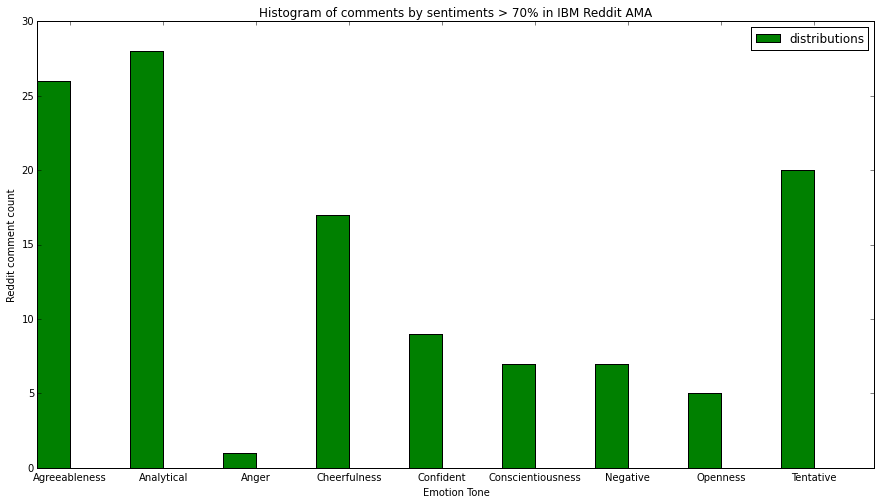

In [33]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
 
ind=np.arange(9)
width = 0.35
bar = plt.bar(ind, sentimentDistribution, width, color='g', label = "distributions")
 
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2.5, plSize[1]*2) )
plt.ylabel('Reddit comment count')
plt.xlabel('Emotion Tone')
plt.title('Histogram of comments by sentiments > 70% in IBM Reddit AMA')
plt.xticks(ind+width, df.columns[-18:9])
plt.legend()
 
plt.show()

#CommentsBySentiments

Collect and list comments by sentiments, that contributed towards different emotional tones for manual introspection and assist algorithm verification.

In [34]:
comments=[]
#comments.append([])
for i, sentiment in enumerate(df.columns[-18:9]):
    commentset = df.filter("cast(" + sentiment + " as String) > 70.0")
    comments.append(commentset.map(lambda p: p.author + "\n\n" + p.text).collect())
    print "\n--------------------------------------------------------------------------------------------"
    print sentiment
    print "--------------------------------------------------------------------------------------------\n"
    for comment in comments[i]:
        print "[-]  " + comment +"\n"
    


--------------------------------------------------------------------------------------------
Agreeableness
--------------------------------------------------------------------------------------------

[-]  Quickitt

First of all thank you so much!

I use Overleaf a lot and it makes my life so much easier. Can you spoil us a bit on upcoming changes for Overleaf?

[-]  doctorink

What would you say are the biggest cultural differences between the  academic world and the corporate?

I think a lot of academics think we'd never make it in industry (because we are used to the soft disorganization of the university). On the other hand, we also  sometimes see corporate culture driven by a lot of nonsensical thinking, or 'trend of the month" behavior. 


And I suspect we are wrong on both sides. Would love to hear what you think . 

[-]  simon99ctg

Dear Dr Hammersley,

I have been teaching Computer Science in a new university for the last 17 years (I'm 51).  I often think of leaving academia 